In [1]:
%matplotlib inline

In [45]:
import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import unophysics as uno

from pathlib import Path
data_dir = Path('data')
data_path = data_dir / '7164403B.130'

In [32]:
e = uno.ladc.EARS(data_path)
N = len(e.data)
t = np.linspace(0, N/e.fs, N)

e.time_0

datetime.datetime(2017, 6, 14, 11, 2, 2, 37500)

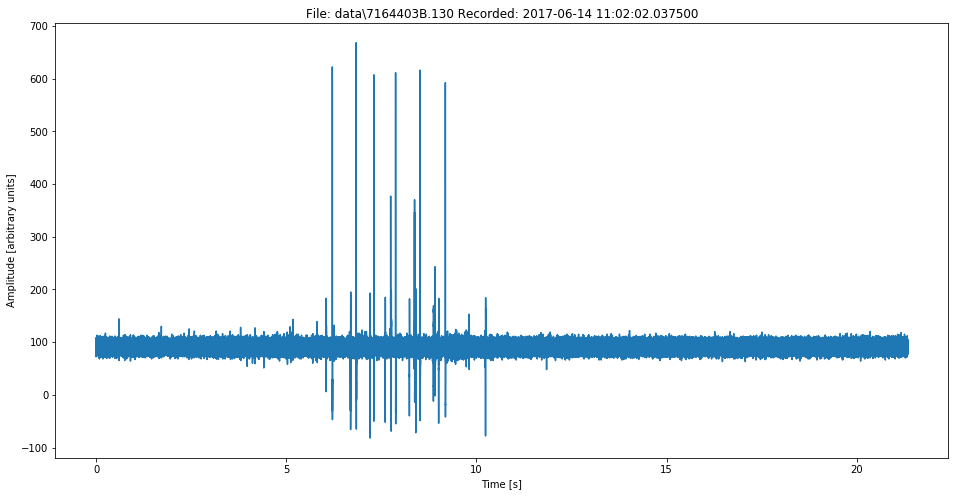

In [33]:
plt.figure(figsize=(16, 8))
plt.plot(t, e.data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [arbitrary units]')
plt.title(f'File: {data_path} Recorded: {e.time_0}')
plt.show()

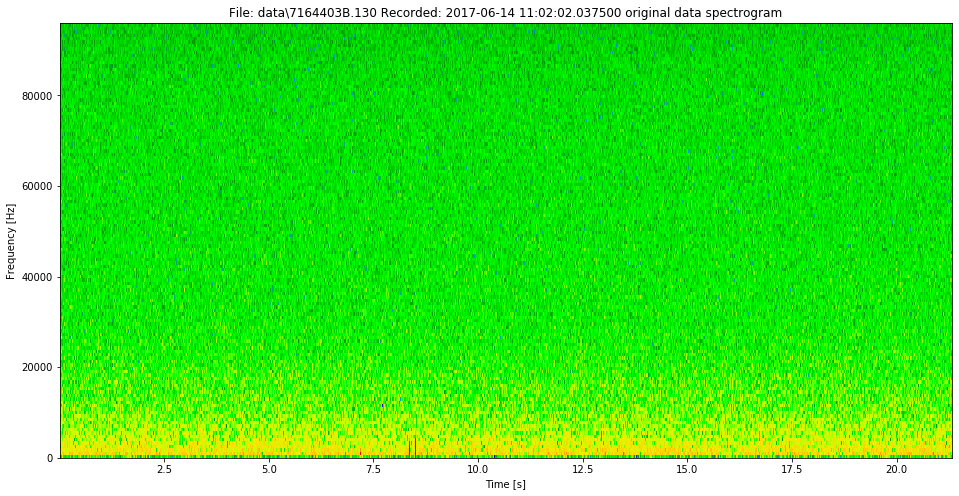

In [64]:
f, spec_t, cleaned_spec_0 = sg.spectrogram(np.array(e.data), fs=e.fs)

plt.figure(figsize=(16, 8))
plt.pcolormesh(spec_t, f, 10 * np.log(np.abs(cleaned_spec_0)), cmap='nipy_spectral')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(
    f'File: {data_path} Recorded: {e.time_0} original data spectrogram')
plt.show()

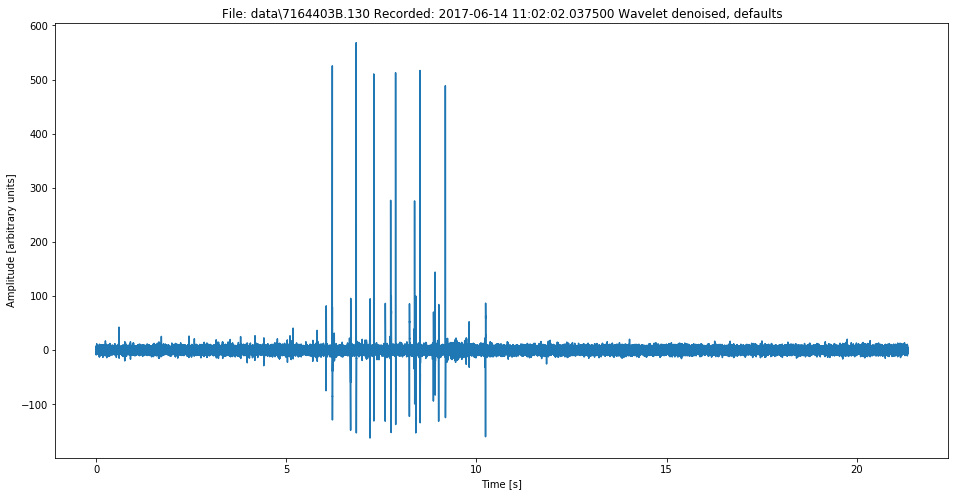

In [36]:
cleaned_0 = uno.wavefuncs.wave_clean(e.data)

plt.figure(figsize=(16, 8))
plt.plot(t, cleaned_0)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [arbitrary units]')
plt.title(f'File: {data_path} Recorded: {e.time_0} Wavelet denoised, defaults')
plt.show()

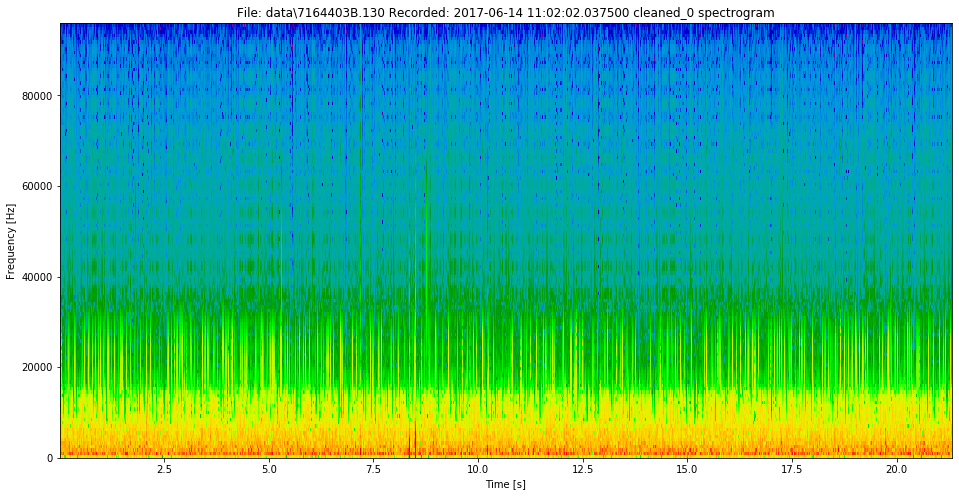

In [65]:
f, spec_t, cleaned_spec_0 = sg.spectrogram(cleaned_0, fs=e.fs)

plt.figure(figsize=(16, 8))
plt.pcolormesh(spec_t, f, 10 * np.log(np.abs(cleaned_spec_0)), cmap='nipy_spectral')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(
    f'File: {data_path} Recorded: {e.time_0} cleaned_0 spectrogram')
plt.show()

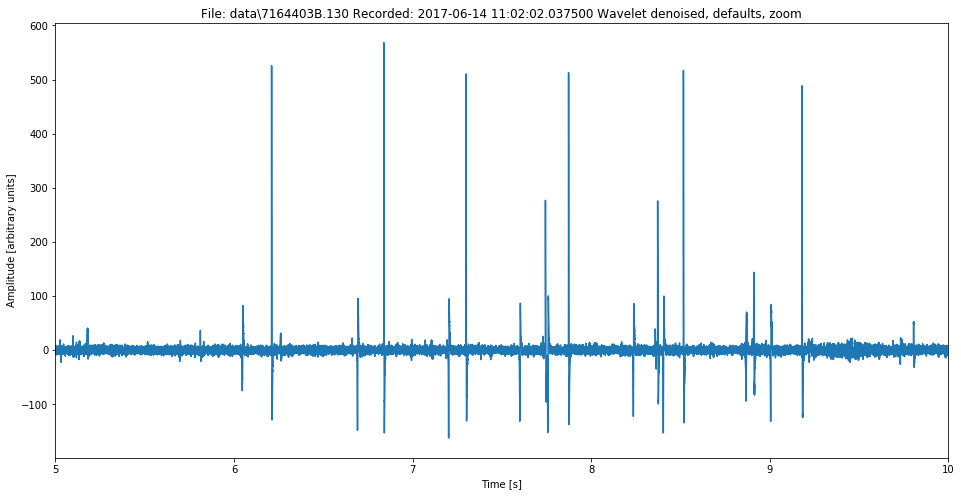

In [44]:
plt.figure(figsize=(16, 8))
plt.plot(t, cleaned_0)
plt.xlim((5, 10))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [arbitrary units]')
plt.title(
    f'File: {data_path} Recorded: {e.time_0} Wavelet denoised, defaults, zoom')
plt.show()